In [1]:
#Importando pandas e o dataset iris
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
#retornando os dados
data = load_iris()

In [3]:
#transformando em um DataFrame
iris = pd.DataFrame(data.data)
iris.columns = data.feature_names
iris['target'] = data.target
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
#Selecionando apenas as colunas de pétala e esses targets
iris1 = iris.loc[iris.target.isin([1,2]), ['petal length (cm)',	'petal width (cm)','target']]

In [5]:
#separando x e y
x = iris1.drop('target', axis=1)
y = iris1.target

In [6]:
#Fazendo o train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

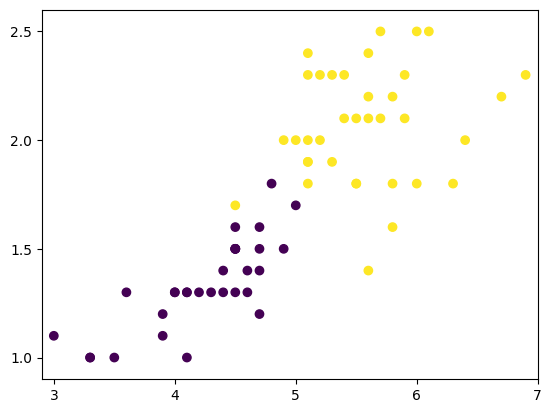

In [7]:
#Vizualizando dados de treino
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(x_train['petal length (cm)'],
           x_train['petal width (cm)'],
           c=y_train)
ax.set(xlim=(2.9, 7), xticks=[3,4,5,6,7],
       ylim=(0.9 , 2.6), yticks=[1,1.5,2,2.5])
plt.show()

In [8]:
#Importando a árvore de decisão
from sklearn import tree

In [9]:
#Criando um classificador
clf = tree.DecisionTreeClassifier(random_state=42)

In [10]:
#Fazendo o fit com os dados de treino
clf = clf.fit(x_train,y_train)

In [11]:
#Verificando Score
clf.score(x_train, y_train)

1.0

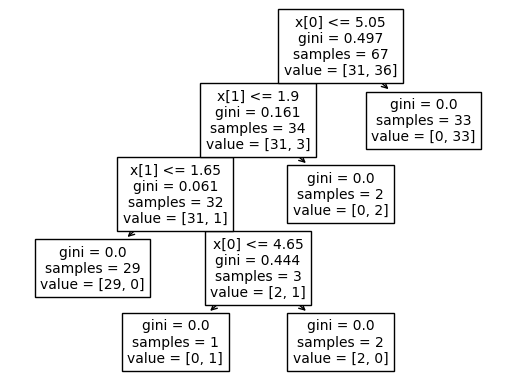

In [12]:
#Vizualizando arvore
fig, ax = plt.subplots()

tree.plot_tree(clf)

plt.show()

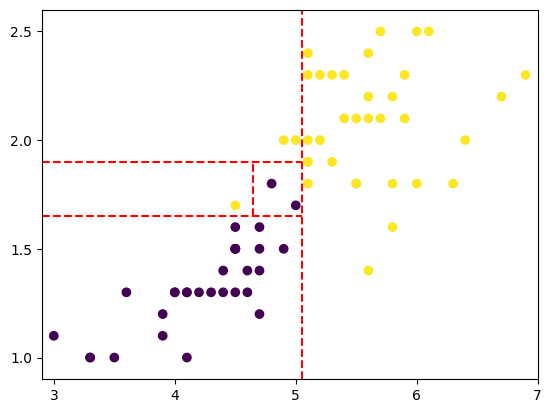

In [13]:
#Adicionar regras no gráfico
fig, ax = plt.subplots()

ax.scatter(x_train['petal length (cm)'],
           x_train['petal width (cm)'],
           c=y_train)
ax.plot([5.05,5.05], [0.9,2.7], '--r')
ax.plot([2.9,5.05], [1.9,1.9], '--r')
ax.plot([2.9,5.05], [1.65,1.65], '--r')
ax.plot([4.65,4.65], [1.65,1.9], '--r')

ax.set(xlim=(2.9, 7), xticks=[3,4,5,6,7],
       ylim=(0.9 , 2.6), yticks=[1,1.5,2,2.5])
plt.show()


In [14]:
#Fazendo previsão e avaliando o erro
y_pred = clf.predict(x_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[18,  1],
       [ 6,  8]])

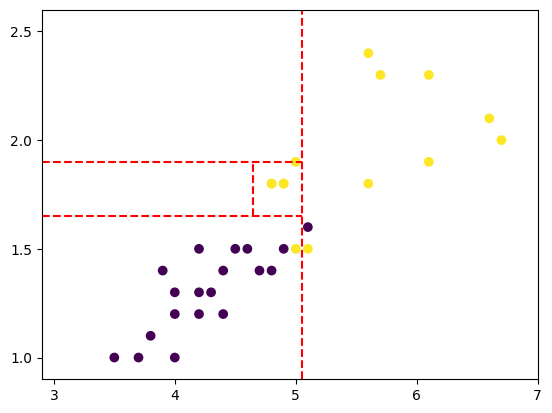

In [15]:
#Vizualizando dados de teste no gráfico acima
fig, ax = plt.subplots()

ax.scatter(x_test['petal length (cm)'],
           x_test['petal width (cm)'],
           c=y_test)
ax.plot([5.05,5.05], [0.9,2.7], '--r')
ax.plot([2.9,5.05], [1.9,1.9], '--r')
ax.plot([2.9,5.05], [1.65,1.65], '--r')
ax.plot([4.65,4.65], [1.65,1.9], '--r')

ax.set(xlim=(2.9, 7), xticks=[3,4,5,6,7],
       ylim=(0.9 , 2.6), yticks=[1,1.5,2,2.5])
plt.show()

In [16]:
#Refazendo com a base completa
X = iris.drop('target', axis=1)
y = iris.target

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
clf2 = tree.DecisionTreeClassifier(random_state=42).fit(x_train, y_train)

In [19]:
clf2.score(x_train, y_train)

1.0

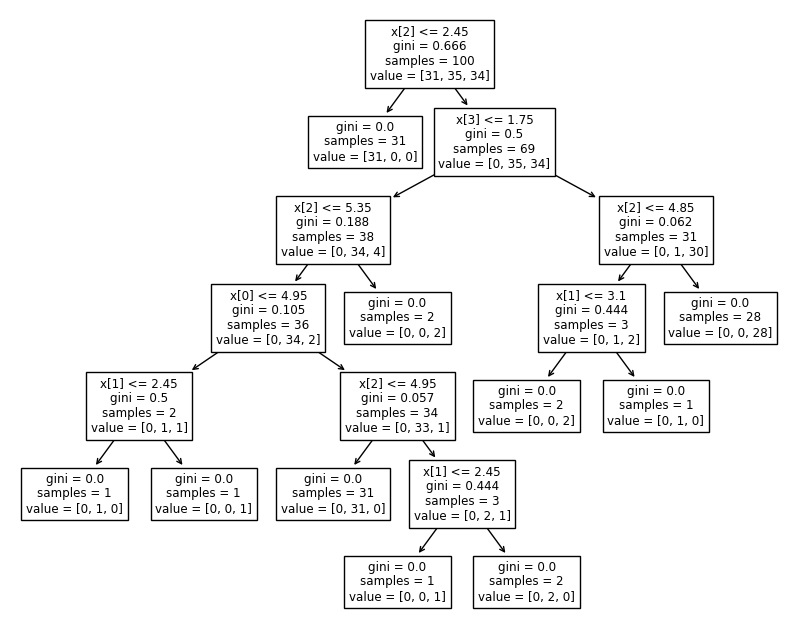

In [20]:
fig, ax = plt.subplots(figsize=(10,8))

tree.plot_tree(clf2)

plt.show()

In [21]:
y_pred2 = clf2.predict(x_test)

In [22]:
confusion_matrix(y_test, y_pred2)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]])